In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def estimate_q(df):
    df.index += 1
    df["q_est"] = df["posterior_error_prob"].cumsum() / df.index
    return df

def estimate_and_save(output_dir, N_values):
    for n in N_values:
        df = pd.read_csv(f"{output_dir}/{n}/peptide.target.txt", sep="\t")
        df = estimate_q(df)
        columns_to_drop = ["PSMId", "filename", "peptide", "proteinIds"]
        df = df.drop(columns=columns_to_drop)
        df.to_csv(f"{output_dir}/{n}/q_pep.txt", sep='\t', index=False)

In [10]:
output_dir = "output"
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
models = ["tdcPEP"]
N_values = [i for i in range(4)]
num_runs = 10
for n in range(1, num_runs + 1):
    for model in models:
        estimate_and_save(f"{output_dir}/run{n}/{model}", N_values)

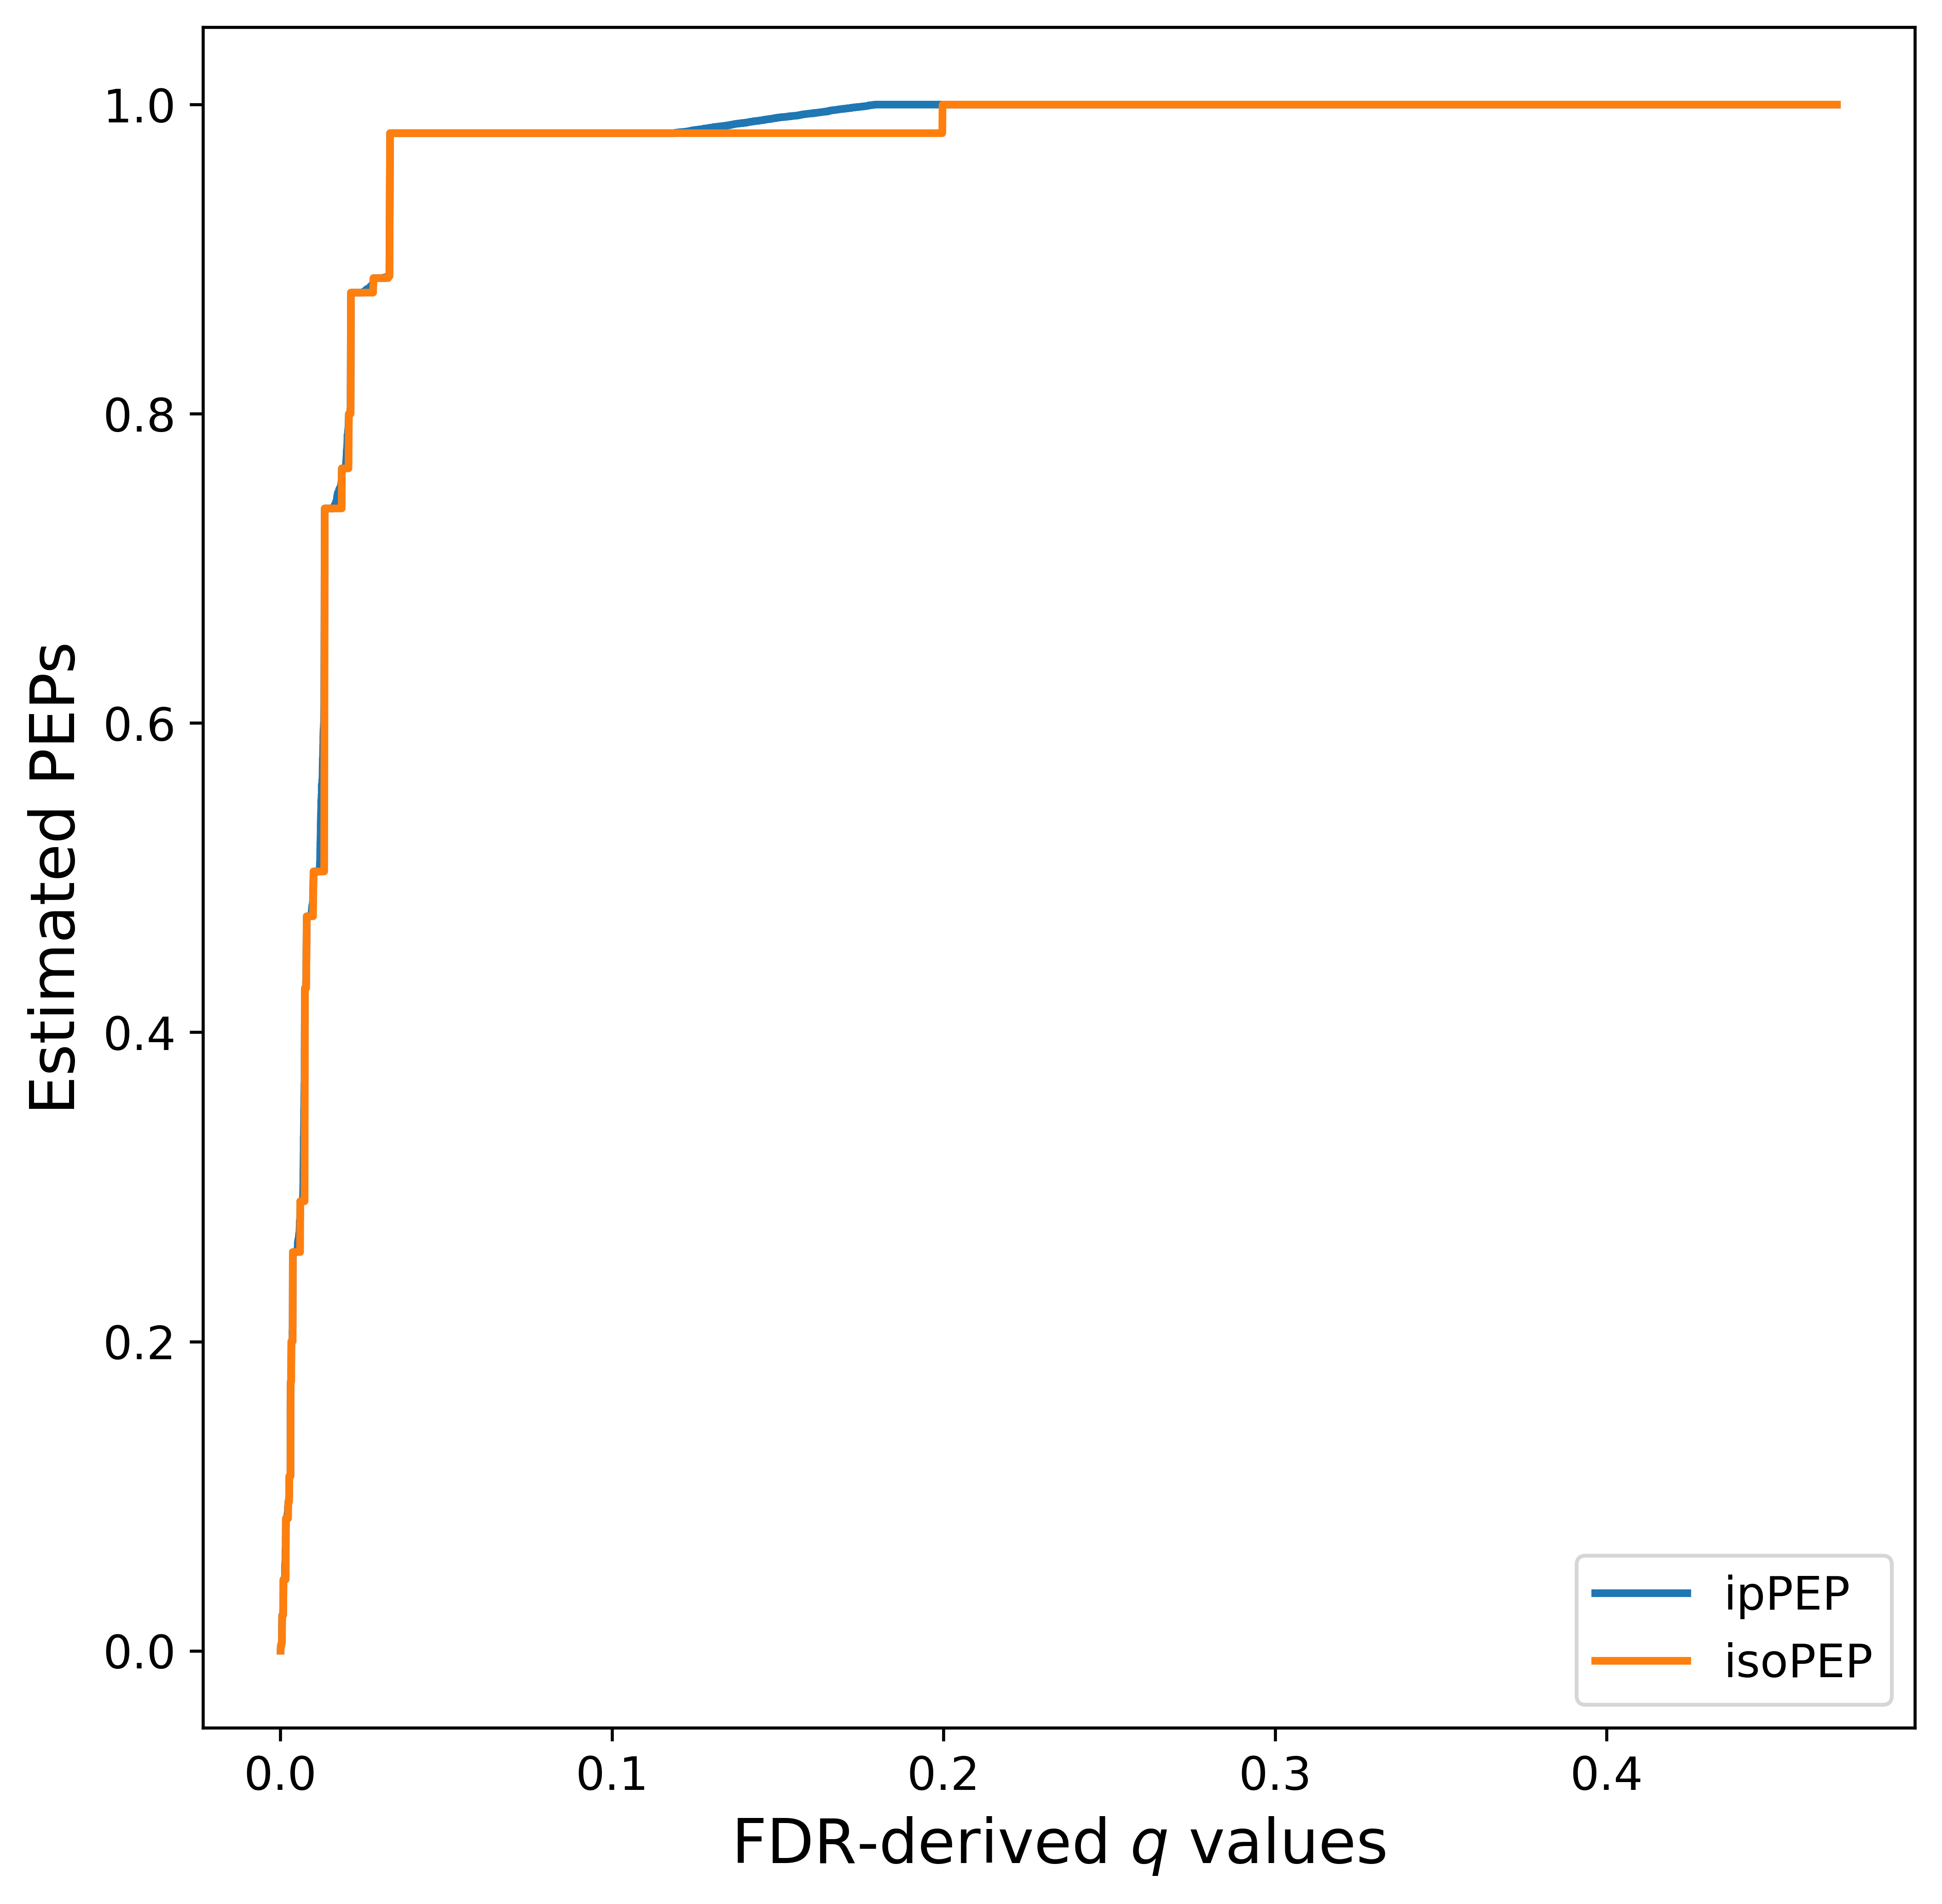

In [4]:
N = 0
run = 1
output_dir = "output"
models = ["ipPEP", "isoPEP"]
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
plt.figure(figsize=(8, 8), dpi=600)
# plt.text(0.05, 0.9, f"N = {N}, Run {run}", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
for model in models:
    df = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")
    plt.plot(df["q-value"], df["posterior_error_prob"], label=f"{model}", linewidth=2)

plt.xlabel("FDR-derived $q$ values", fontsize=16)
plt.ylabel("Estimated PEPs", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)
# plt.savefig(f"figs/interp_vs_basic.logit_mean_bm.png",bbox_inches="tight")
plt.show()


In [15]:
N = 0
run = 1
output_dir = "output"
models = ["tdcPEP", "isoPEP"]
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
plt.figure(figsize=(8, 8), dpi=600)
plt.text(0.05, 0.9, f"N = {N}, Run {run}", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
for model in models:
    df = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")
    plt.plot(df["q-value"], df["q_est"], label=f"{model}", linewidth=2)
a = np.linspace(0, 1, 100)
b = a / 10 ** 0.25
c = a * 10 ** 0.25
plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
plt.plot(a, a, c="k", linewidth=0.5)
plt.xlabel("FDR-derived $q$ values", fontsize=16)
plt.ylabel("PEPs-derived $q$ values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.00001, 1)
plt.ylim(0.00001, 1)
# plt.savefig(f"figs/interp_vs_basic.logit_mean_bm.png",bbox_inches="tight")
plt.show()


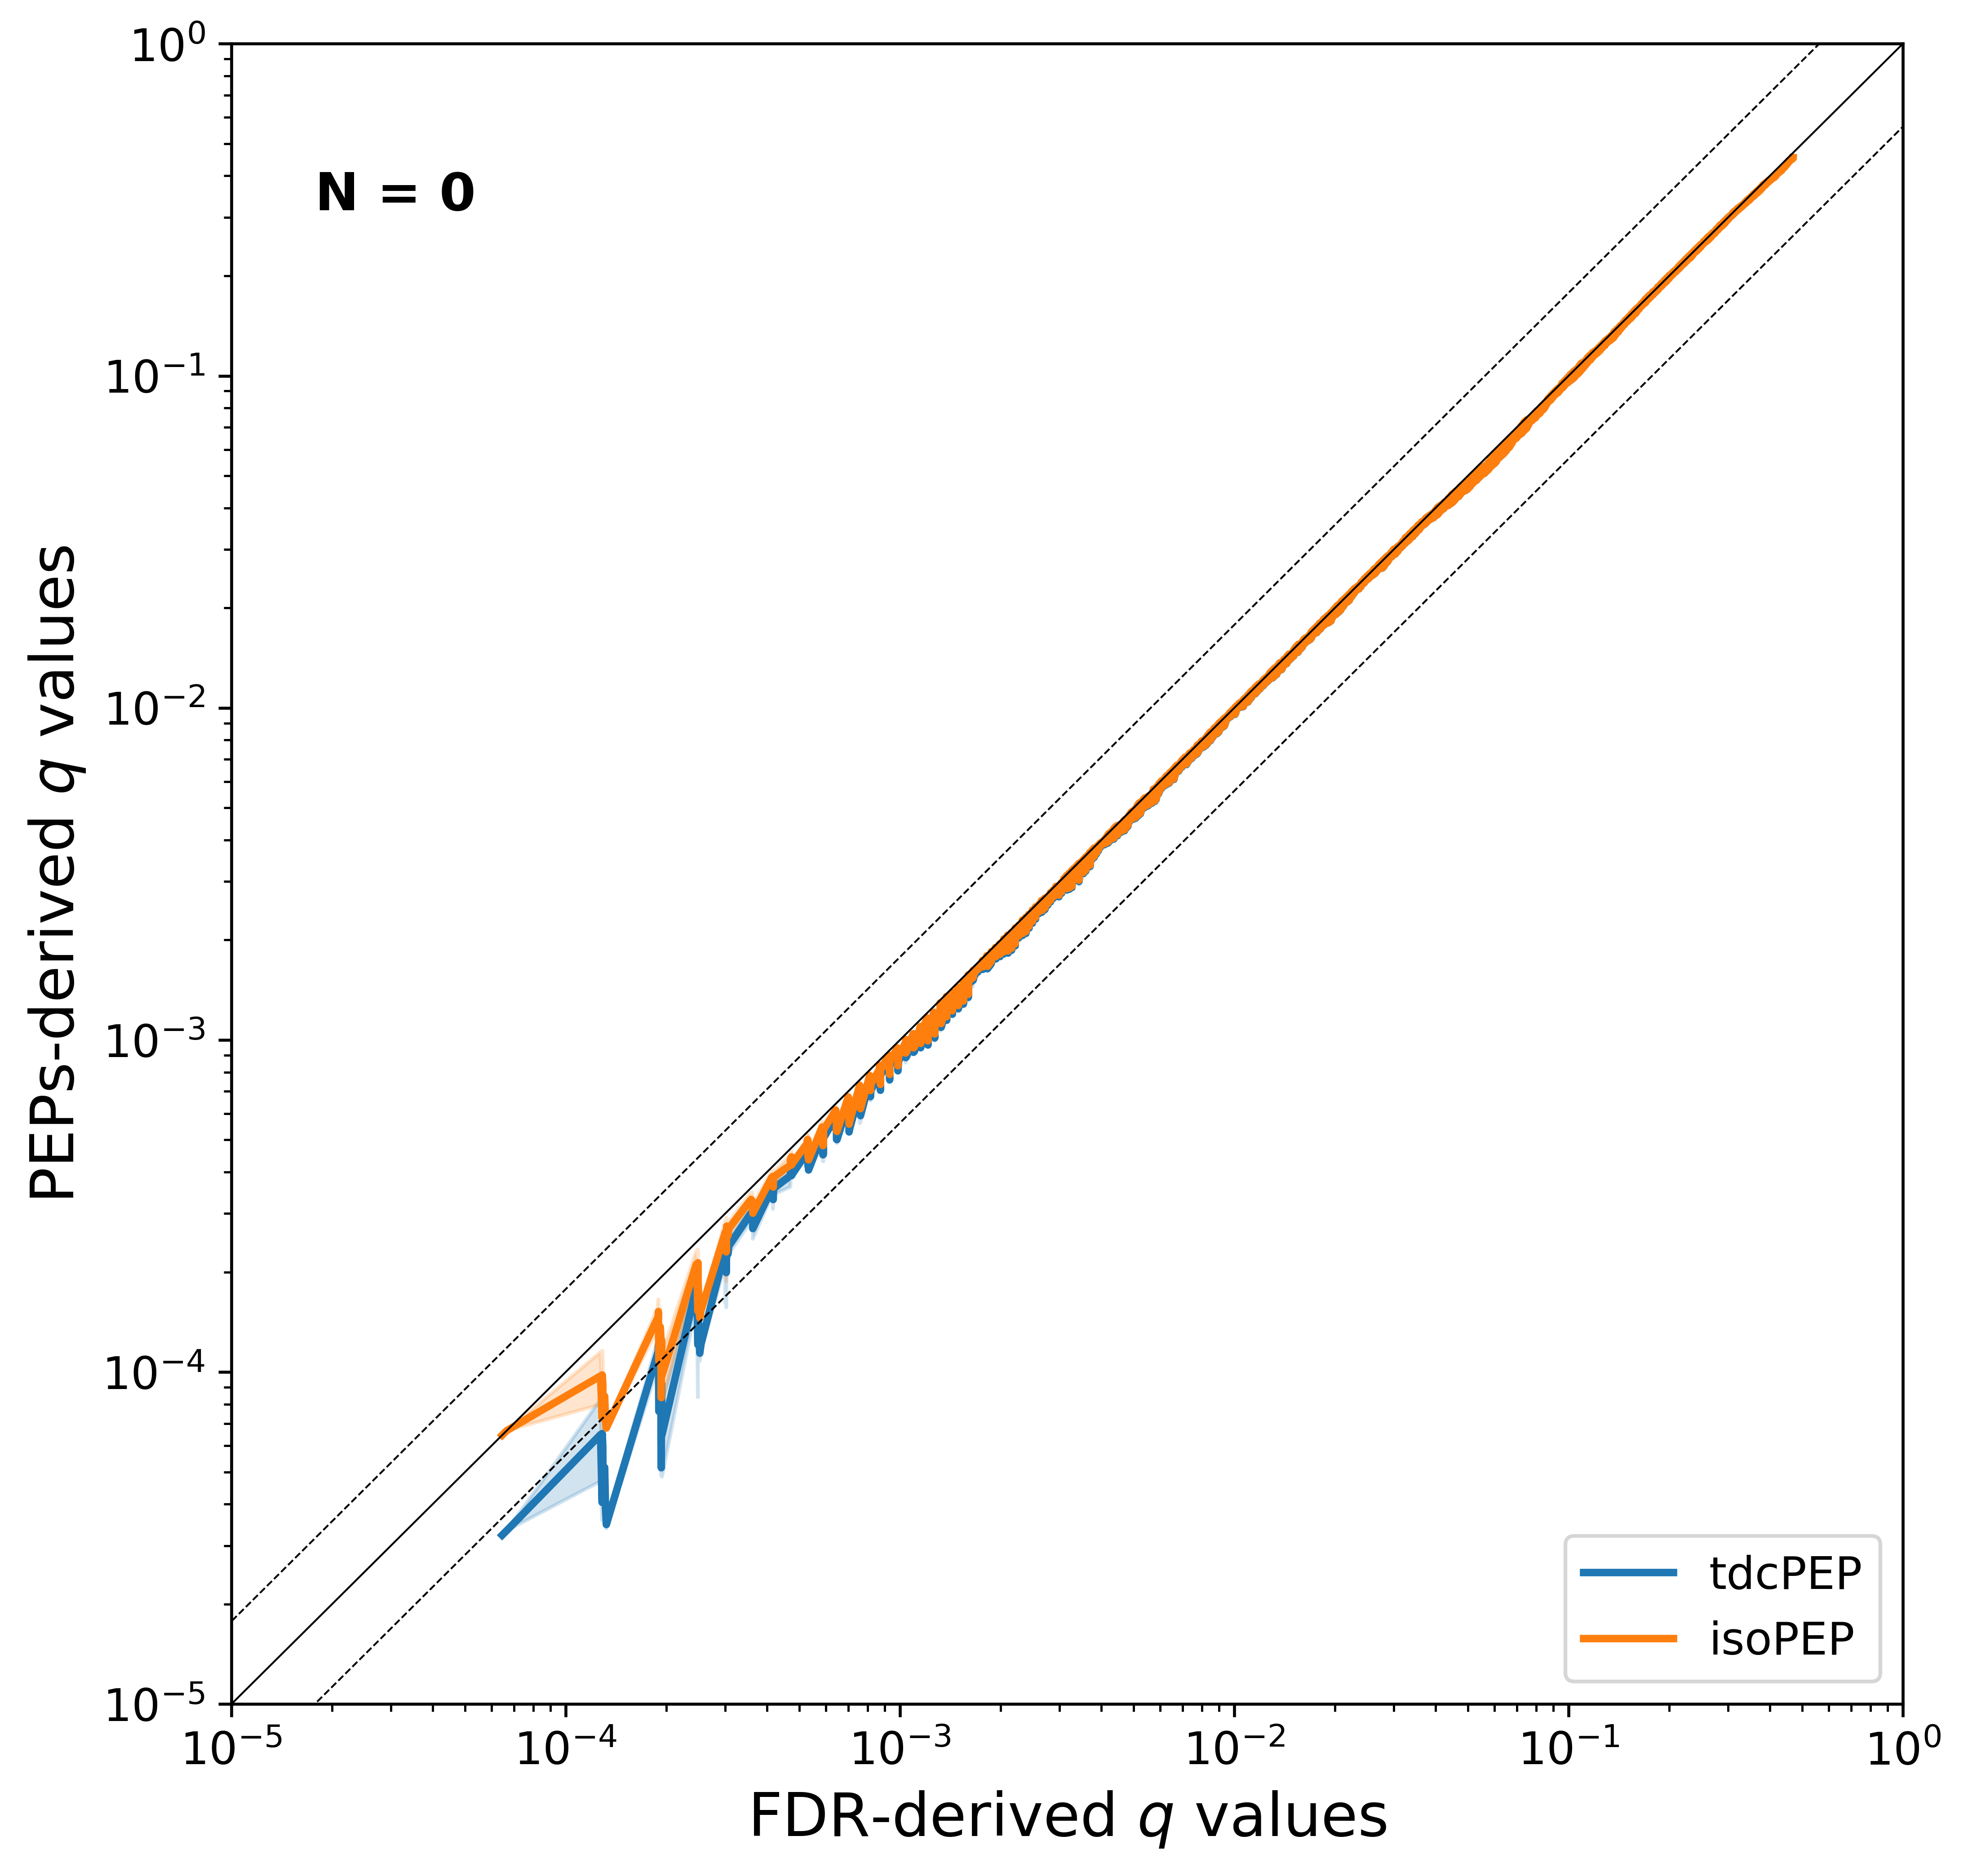

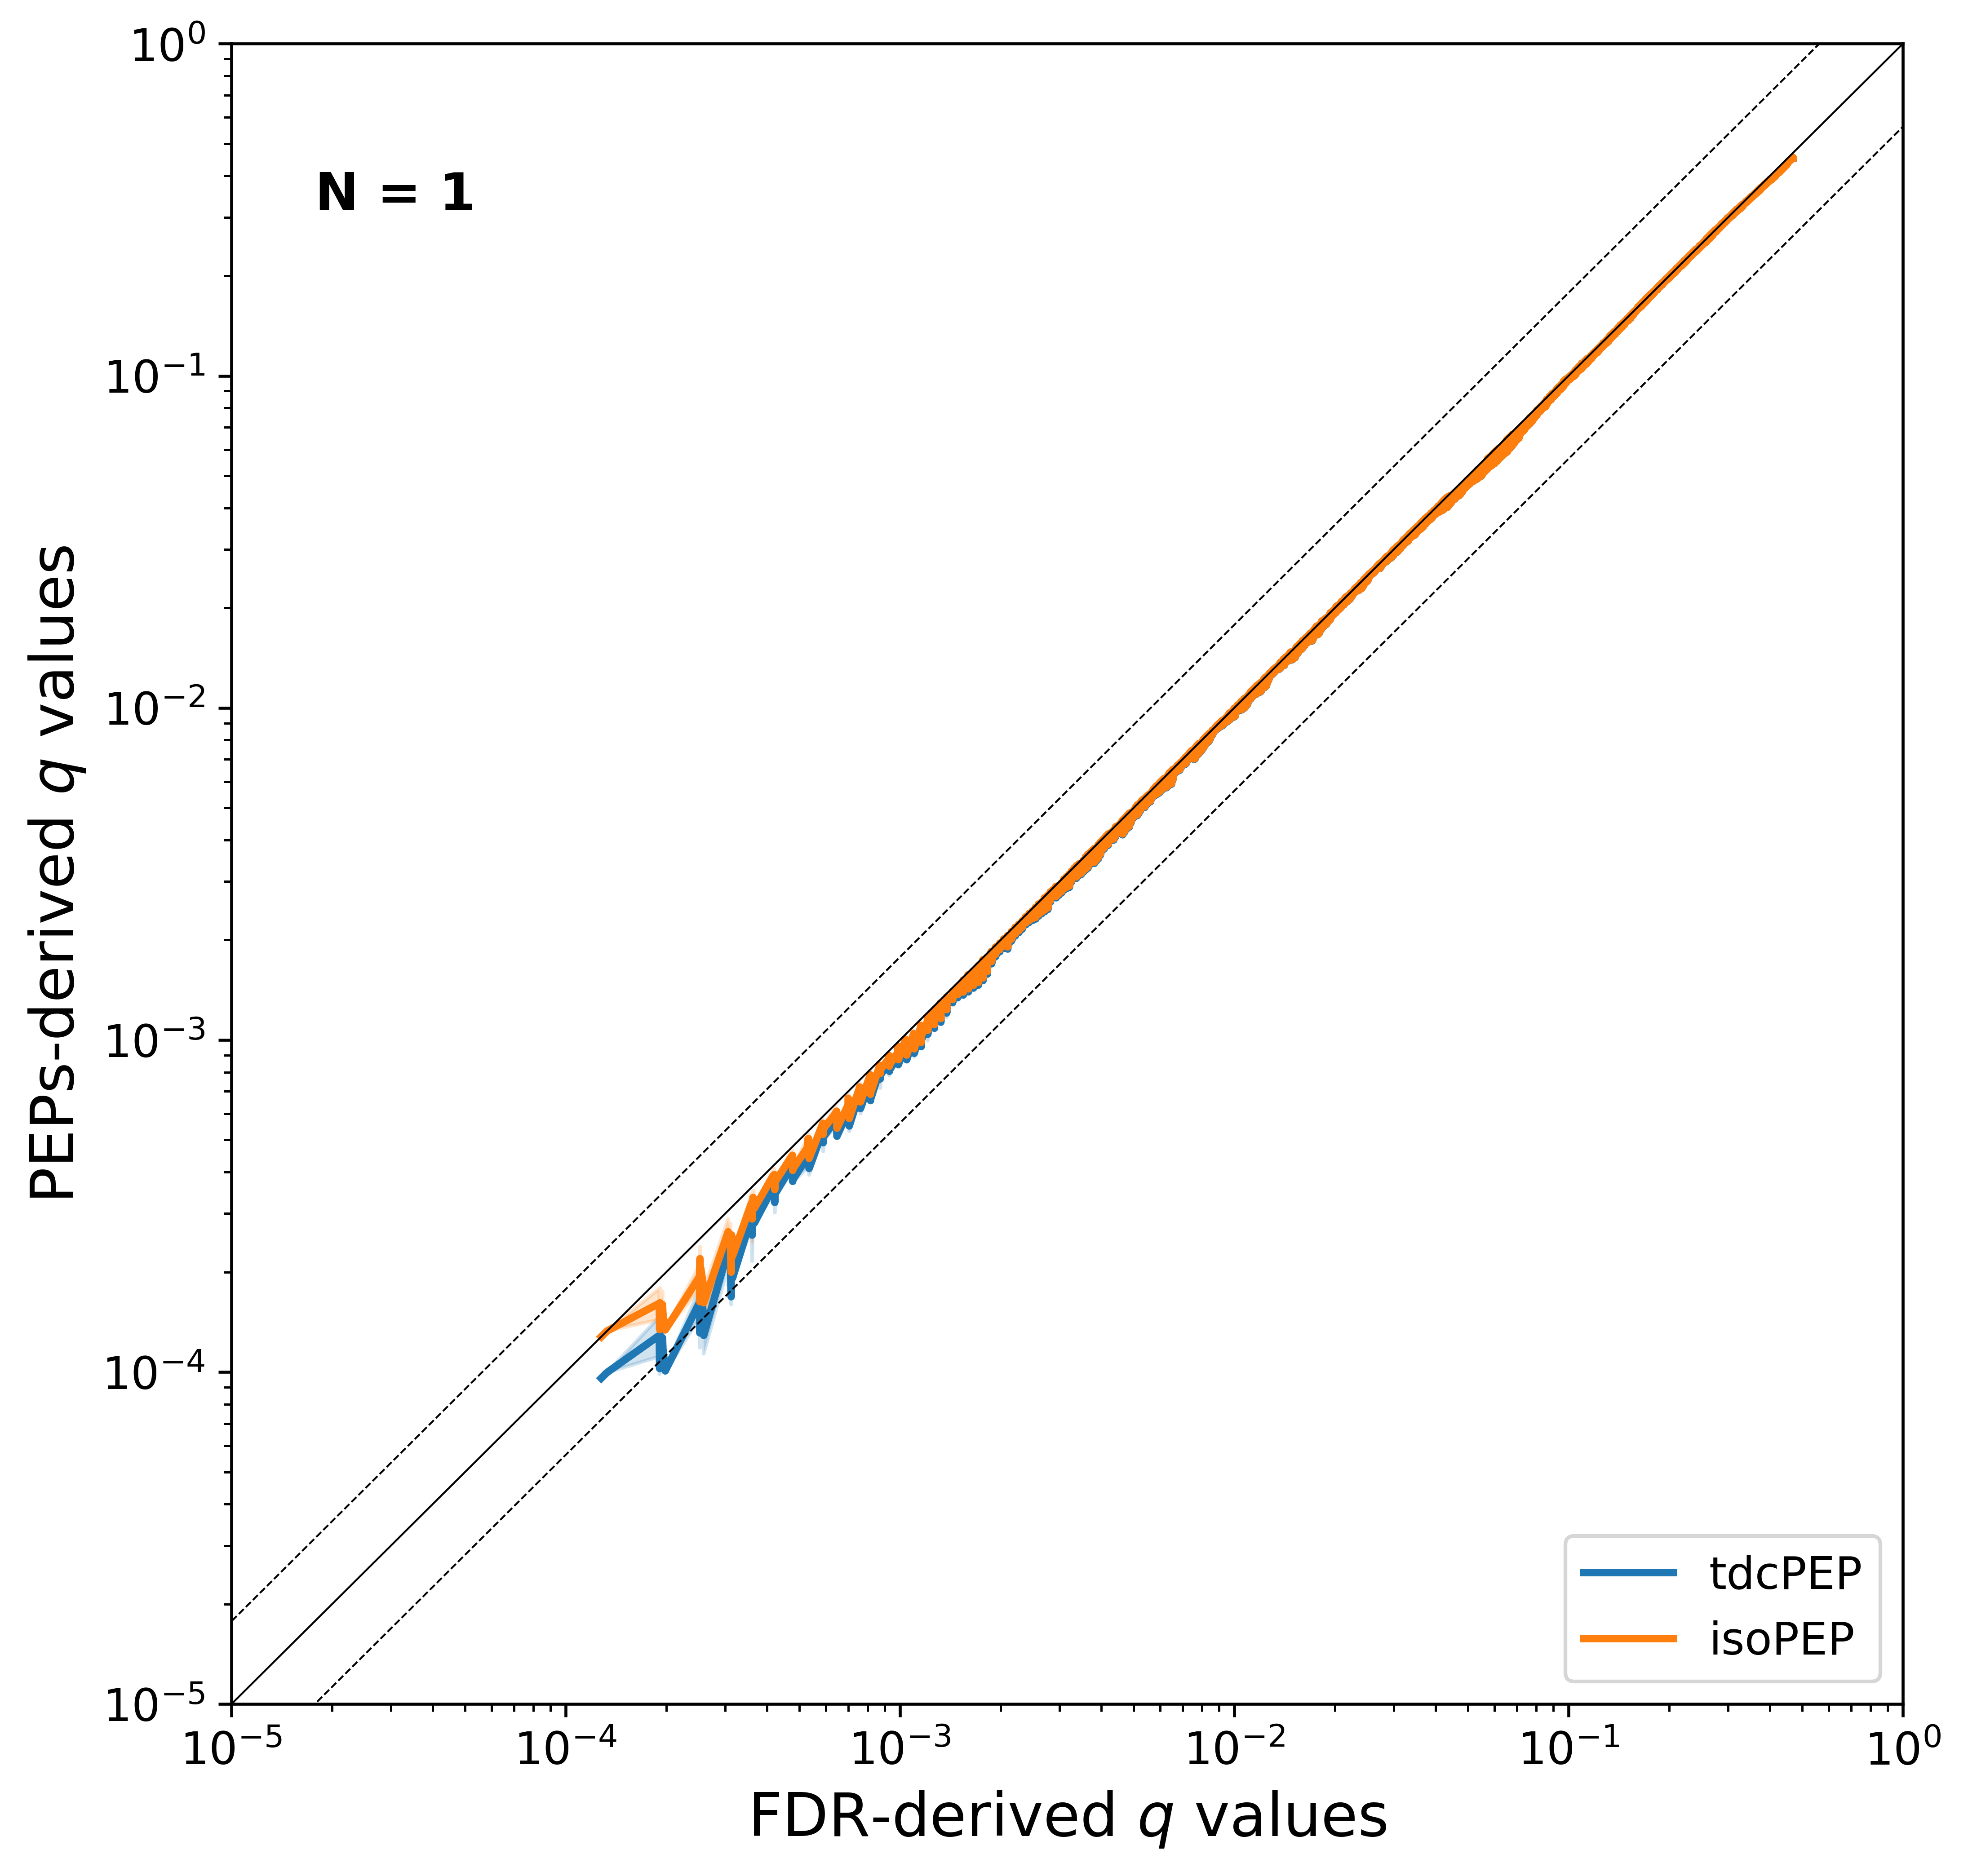

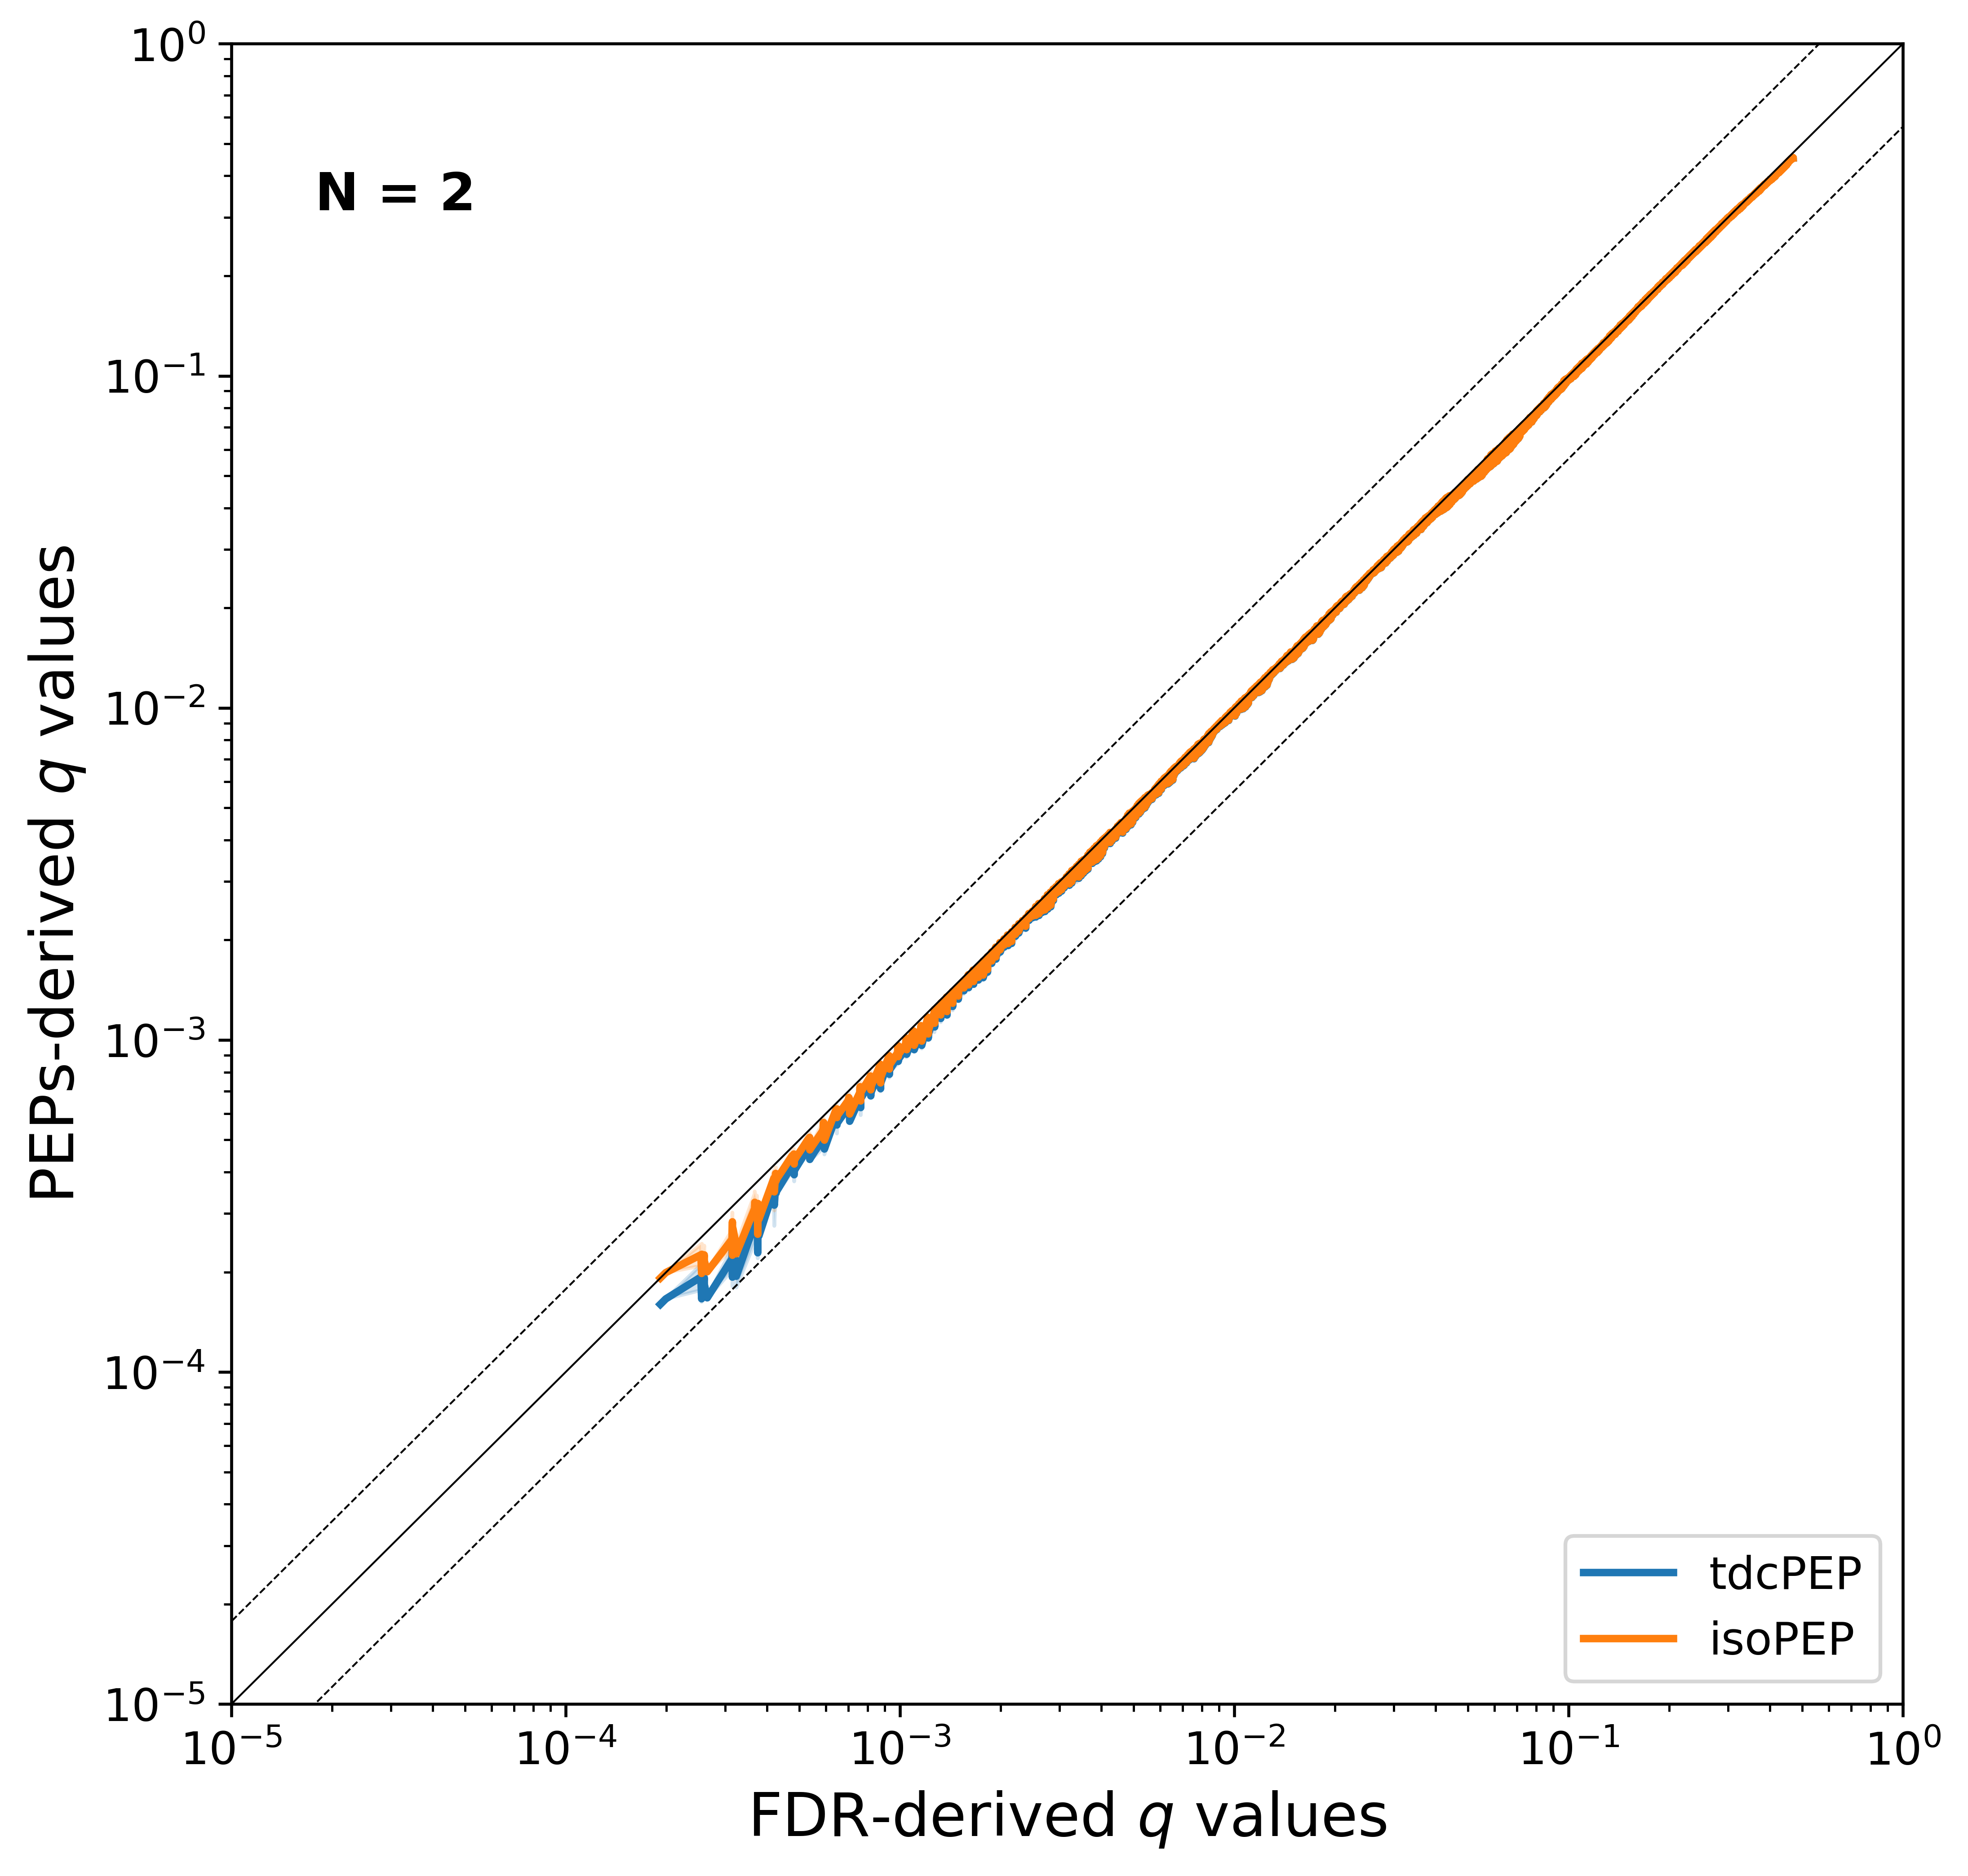

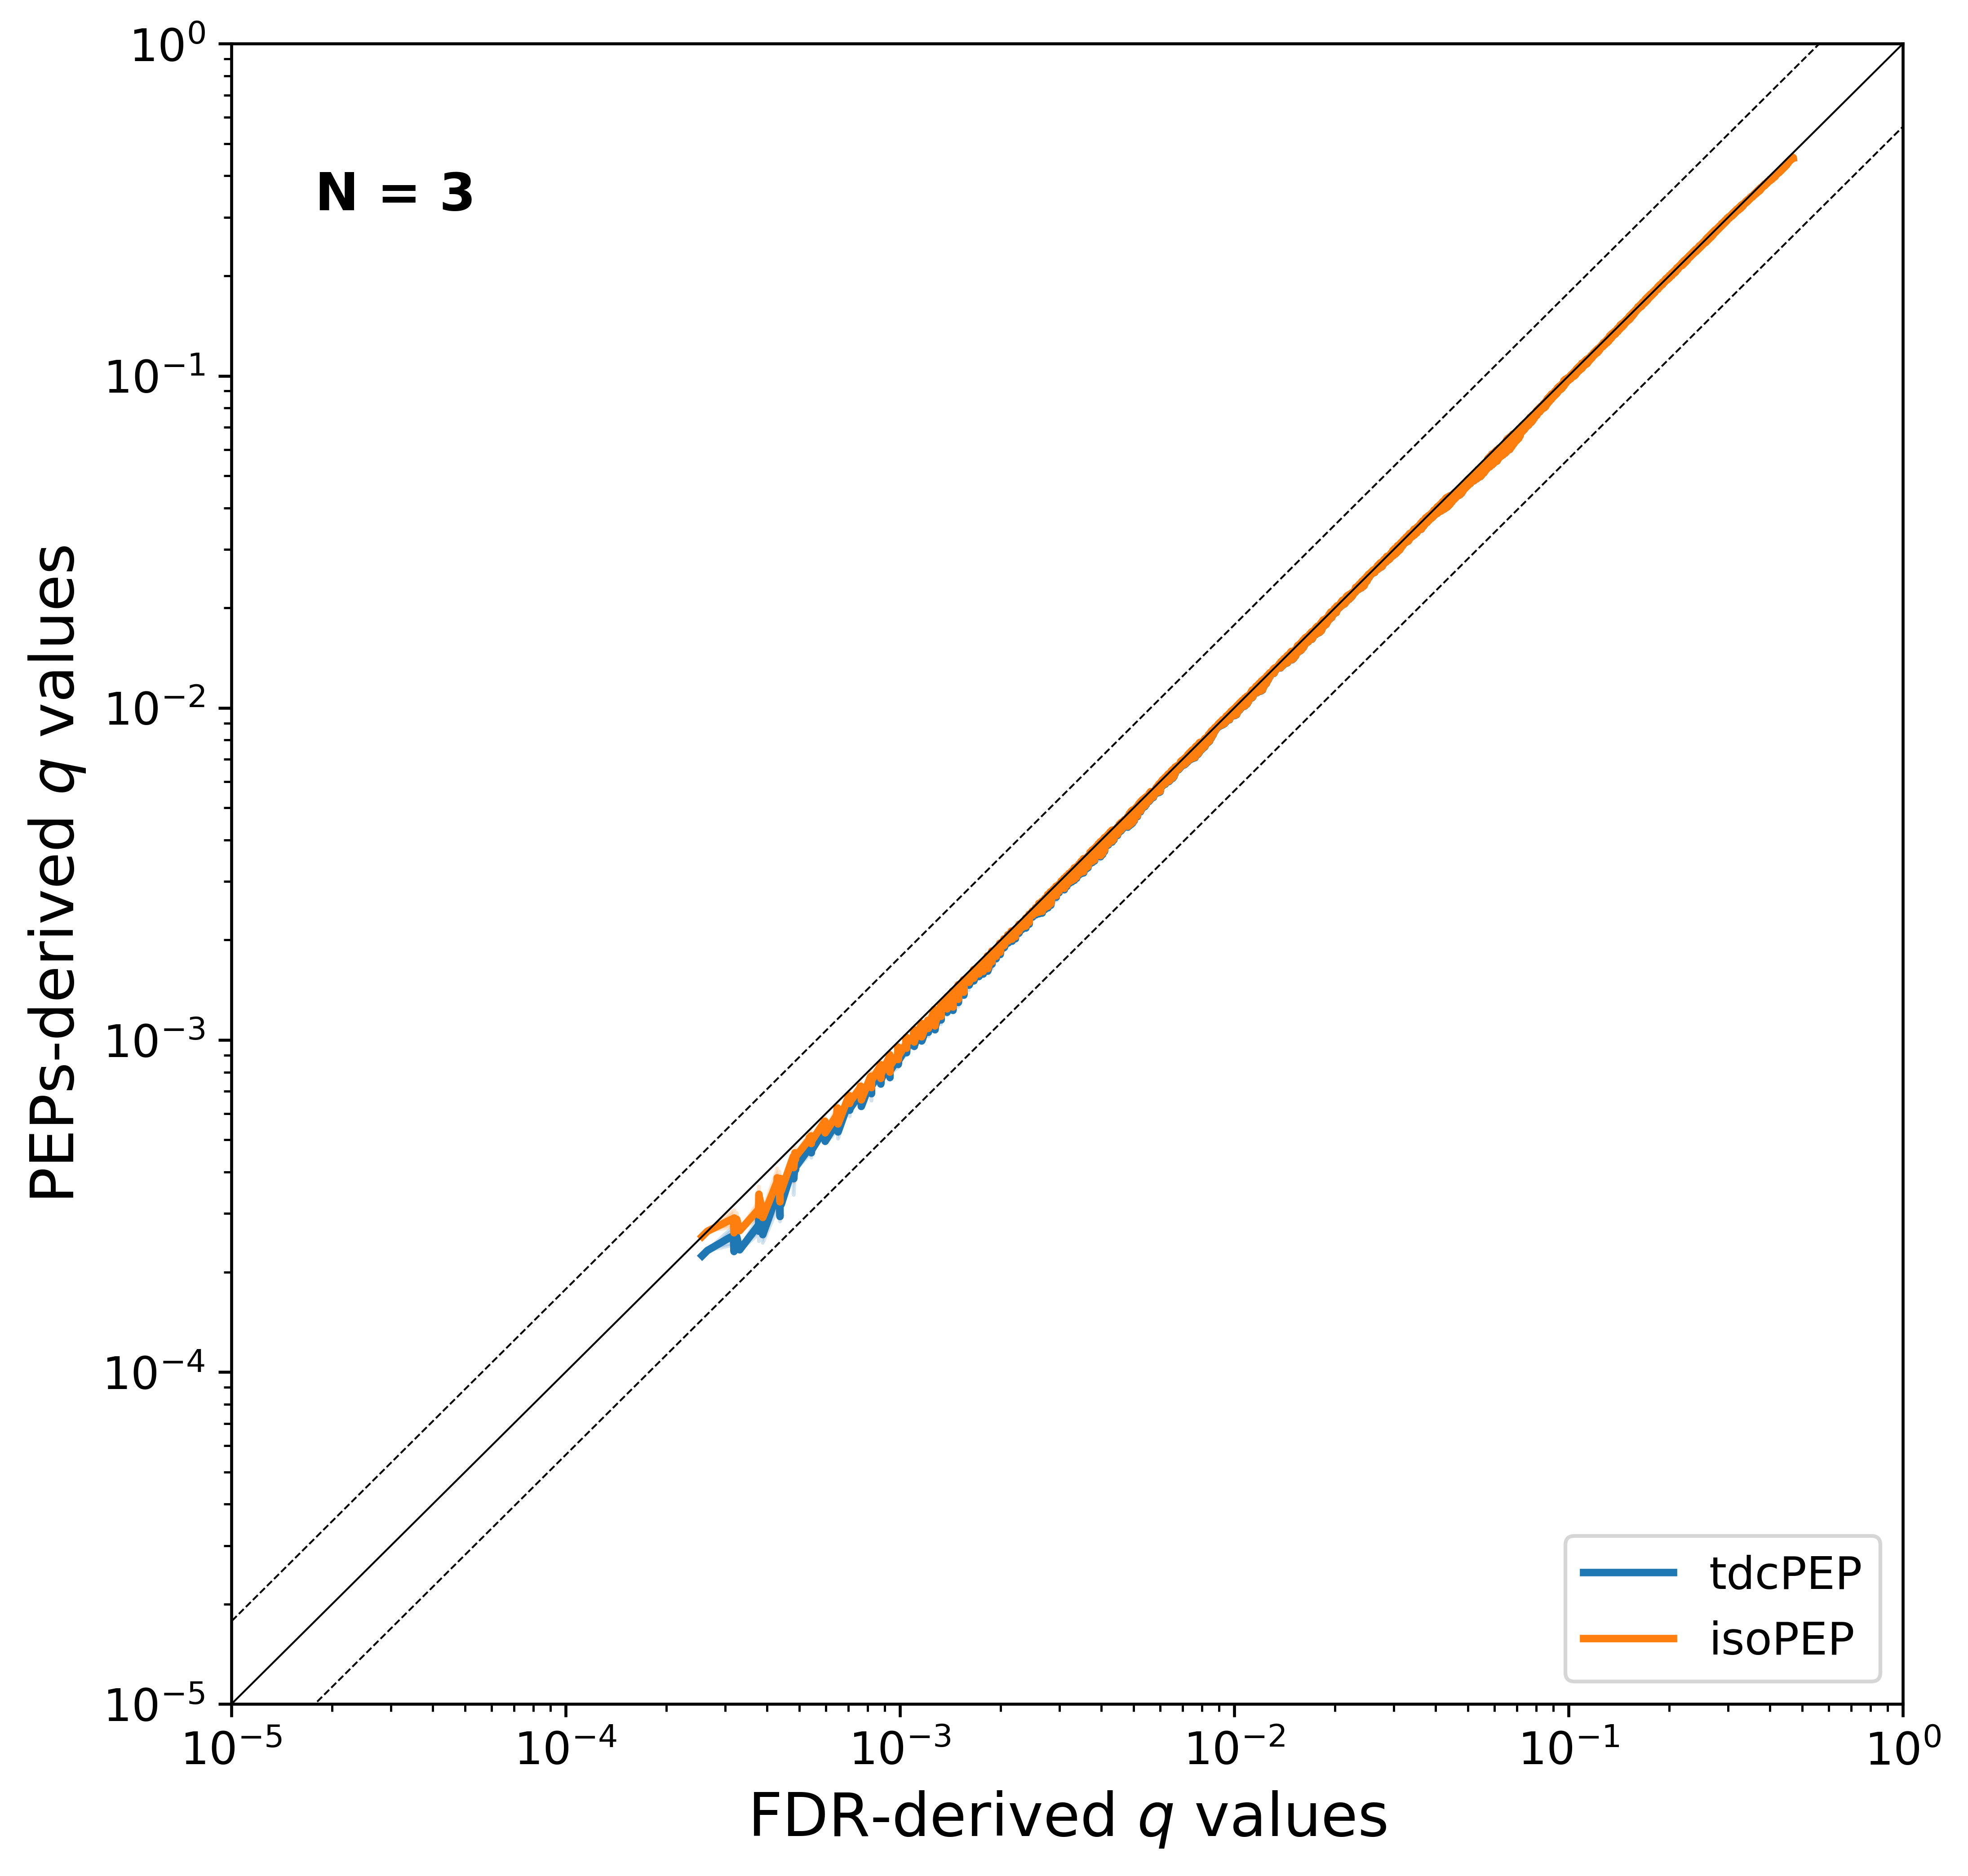

In [ ]:
N_values = [i for i in range(4)]
num_runs = 10
output_dir = "output"
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
models = ["tdcPEP", "isoPEP"]
for N in N_values:
    plt.figure(figsize=(8, 8), dpi=600)
    plt.text(0.05, 0.9, f"N = {N}", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    results = []
    for run in range(1, num_runs + 1):
        for model in models:
            df = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")
            results.append(pd.DataFrame({
            "q-value": df["q-value"],
            "q_est": df["q_est"],
            "model": model
            }))
    df = pd.concat(results)
    sns.lineplot(data=df, x="q-value", y="q_est", hue="model", errorbar="sd", linewidth=2)

    a = np.linspace(0, 1, 100)
    b = a / 10 ** 0.25
    c = a * 10 ** 0.25
    plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, a, c="k", linewidth=0.5)
    plt.xlabel("FDR-derived $q$ values", fontsize=16)
    plt.ylabel("PEPs-derived $q$ values", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='lower right', fontsize=12)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.00001, 1)
    plt.ylim(0.00001, 1)
    plt.savefig(f"figs/decoy_influence.N{N}.png", bbox_inches="tight")
    plt.show()

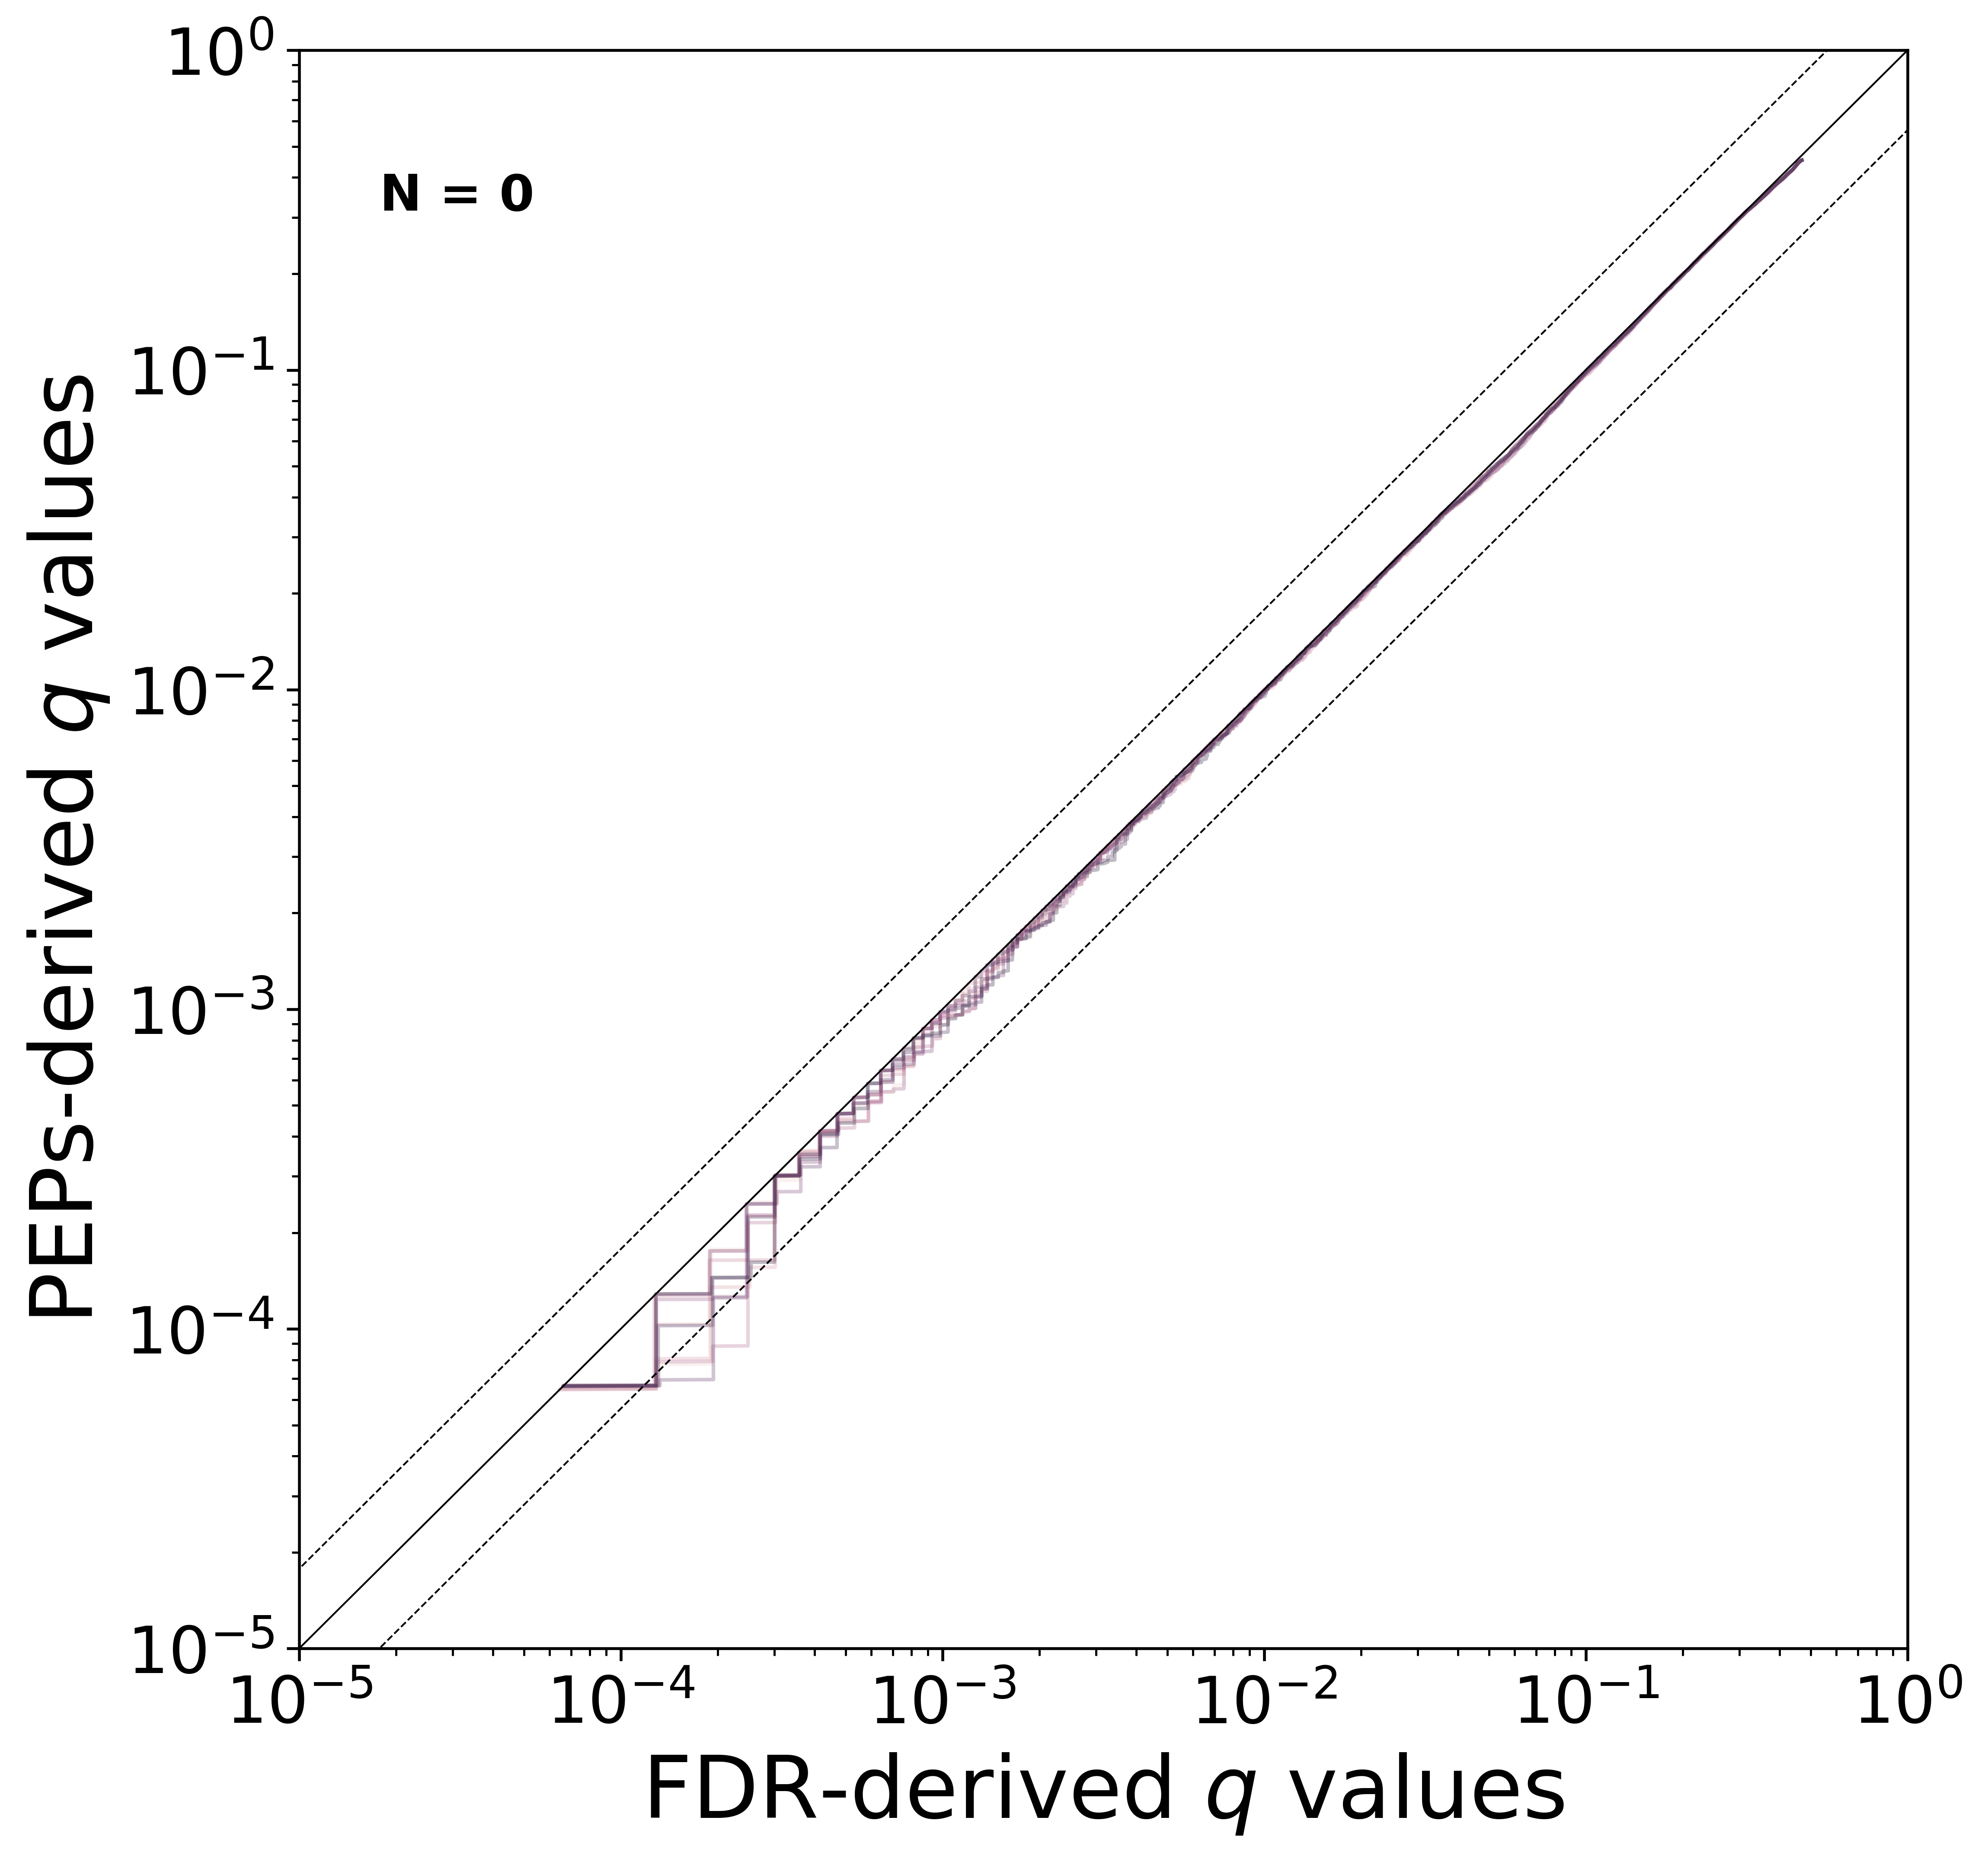

In [18]:
N_values = [0]
num_runs = 10
output_dir = "output"
models = ["isoPEP"]

for N in N_values:
    plt.figure(figsize=(8, 8), dpi=600)
    plt.text(0.05, 0.9, f"N = {N}", transform=plt.gca().transAxes, 
             fontsize=14, fontweight='bold')
    results = []
    
    for run in range(1, num_runs + 1):
        for model in models:
            df_tmp = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")

            results.append(pd.DataFrame({
                "q-value": df_tmp["q-value"],
                "q_est": df_tmp["q_est"],
                "model": model,
                "run": run
            }))

    df = pd.concat(results, ignore_index=True)
    
    sns.lineplot(
        data=df, x="q-value", y="q_est", 
        hue="run", estimator=None, alpha=0.3, linewidth=1, legend=False
    )
    # sns.lineplot(
    #     data=df, x="q-value", y="q_est", 
    #     color="black", estimator="mean", errorbar="sd", linewidth=2, 
    #     label="Mean ± SD"
    # )

    a = np.linspace(0, 1, 100)
    b = a / 10 ** 0.25
    c = a * 10 ** 0.25
    plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, a, c="k", linewidth=0.5)

    plt.xlabel("FDR-derived $q$ values", fontsize=24)
    plt.ylabel("PEPs-derived $q$ values", fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1e-5, 1)
    plt.ylim(1e-5, 1)
    plt.show()


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Parameters
N_values = [0]                # List of N values to iterate over
num_runs = 10                 # Number of runs per model
output_dir = "output"         # Directory containing output files
models = ["tdcPEP", "isoPEP"]  # List of models to compare; all models will be plotted in one figure

# Define a list of colors for different models (each model will use one color for all its runs)
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:pink', 'tab:purple', 'tab:cyan']  # Extend this list if needed

for N in N_values:
    plt.figure(figsize=(8, 8), dpi=600)
    plt.text(0.05, 0.9, f"N = {N}", transform=plt.gca().transAxes, 
             fontsize=14, fontweight='bold')
    
    # Loop over each model; different models will be plotted in one figure
    for i, model in enumerate(models):
        color = color_list[i % len(color_list)]
        
        # --------------------
        # 1) Read & combine data for all runs of the current model
        # --------------------
        model_runs = []
        for run in range(1, num_runs + 1):
            file_path = os.path.join(output_dir, f"run{run}", model, str(N), "q_pep.txt")
            df_tmp = pd.read_csv(file_path, sep="\t")
            df_tmp["run"] = run
            model_runs.append(df_tmp)
        df_model = pd.concat(model_runs, ignore_index=True)
        
        # --------------------
        # 2) Collect all unique q-value points (the step points)
        # --------------------
        unique_q = np.unique(df_model["q-value"].values)
        unique_q.sort()
        aligned_df = pd.DataFrame({"q-value": unique_q})
        
        # --------------------
        # 3) For each run, align its step function onto the shared q-value grid
        # --------------------
        for run in range(1, num_runs + 1):
            df_run = df_model[df_model["run"] == run].sort_values("q-value")
            run_qvals = df_run["q-value"].values
            run_qests = df_run["q_est"].values
            aligned_values = []
            current_index = 0
            current_qest = run_qests[0]
            
            for q in unique_q:
                # Extend the previous value until a new q-value is reached
                while current_index < len(run_qvals) and q >= run_qvals[current_index]:
                    current_qest = run_qests[current_index]
                    current_index += 1
                aligned_values.append(current_qest)
            aligned_df[f"run_{run}"] = aligned_values
        
        # --------------------
        # 4) Compute mean and standard deviation at each q-value point
        # --------------------
        run_cols = [col for col in aligned_df.columns if col.startswith("run_")]
        aligned_df["mean"] = aligned_df[run_cols].mean(axis=1)
        aligned_df["std"] = aligned_df[run_cols].std(axis=1)
        
        # --------------------
        # 5) Plot each run's step curve with the same color and low alpha
        # --------------------
        # for run in range(1, num_runs + 1):
        #     plt.step(aligned_df["q-value"], aligned_df[f"run_{run}"],
        #              where="post", color=color, alpha=0.3, linewidth=1)
        
        # --------------------
        # 6) Plot the mean step curve with a thicker line
        # --------------------
        label_mean = r"$q$: PAVA" if model == "isoPEP" else r"$f_D$: PAVA"
        plt.step(aligned_df["q-value"], aligned_df["mean"],
                 where="post", color=color, linewidth=2, label=f"{label_mean}")
        
        # --------------------
        # 7) Fill the area between mean - std and mean + std using step-fill
        # --------------------
        y_lower = aligned_df["mean"] - aligned_df["std"]
        y_upper = aligned_df["mean"] + aligned_df["std"]
        plt.fill_between(aligned_df["q-value"], y_lower, y_upper,
                         step="post", color=color, alpha=0.2)
    
    # --------------------
    # 8) Plot the reference lines
    # --------------------
    a = np.linspace(0, 1, 100)
    b = a / 10 ** 0.25
    c = a * 10 ** 0.25
    plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, a, c="k", linewidth=0.5)
    
    # --------------------
    # 9) Configure the axes, labels, legend and log scales
    # --------------------
    plt.xlabel("FDR-derived $q$ values", fontsize=24)
    plt.ylabel("PEPs-derived $q$ values", fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='lower right', fontsize=24)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1e-5, 1)
    plt.ylim(1e-5, 1)
    plt.show()


In [19]:
N_values = [0]
num_runs = 10
output_dir = "output"
models = ["isoPEP"]

for N in N_values:
    plt.figure(figsize=(8, 8), dpi=600)
    plt.text(0.05, 0.9, f"N = {N}", transform=plt.gca().transAxes, 
             fontsize=14, fontweight='bold')
    results = []
    
    for run in range(1, num_runs + 1):
        for model in models:
            df_tmp = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")

            results.append(pd.DataFrame({
                "q-value": df_tmp["q-value"],
                "q_est": df_tmp["q_est"],
                "model": model,
                "run": run
            }))

    df = pd.concat(results, ignore_index=True)
    
    sns.lineplot(
        data=df, x="q-value", y="q_est", 
        hue="run", estimator=None, alpha=0.3, linewidth=1, legend=False
    )
    sns.lineplot(
        data=df, x="q-value", y="q_est", 
        color="black", estimator="mean", errorbar="sd", linewidth=2, 
        label="Mean ± SD"
    )

    a = np.linspace(0, 1, 100)
    b = a / 10 ** 0.25
    c = a * 10 ** 0.25
    plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, a, c="k", linewidth=0.5)

    plt.xlabel("FDR-derived $q$ values", fontsize=24)
    plt.ylabel("PEPs-derived $q$ values", fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='lower right', fontsize=24)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1e-5, 1)
    plt.ylim(1e-5, 1)
    plt.show()
